In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")

In [4]:
users = pd.read_csv("/content/Users.csv")
ratings = pd.read_csv("/content/Ratings.csv")
books = pd.read_csv("/content/Books.csv")

/tmp/ipython-input-1597008315.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("/content/Books.csv")


In [6]:
print("Users:", users.shape)
print("Ratings:", ratings.shape)
print("Books:", books.shape)

users.head()
ratings.head()
books.head()

Users: (278858, 3)
Ratings: (1149780, 3)
Books: (271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
def missing_report(df, name):
    print(f"\n{name} Missing Values")
    print(df.isnull().sum())

missing_report(users, "USERS")
missing_report(ratings, "RATINGS")
missing_report(books, "BOOKS")


USERS Missing Values
User-ID          0
Location         0
Age         110762
dtype: int64

RATINGS Missing Values
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

BOOKS Missing Values
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [8]:
users['Age'] = users['Age'].replace(0, np.nan)
users.loc[(users['Age'] < 5) | (users['Age'] > 100), 'Age'] = np.nan

median_age = users['Age'].median()
users['Age'].fillna(median_age, inplace=True)

median_age

/tmp/ipython-input-2975608955.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users['Age'].fillna(median_age, inplace=True)


32.0

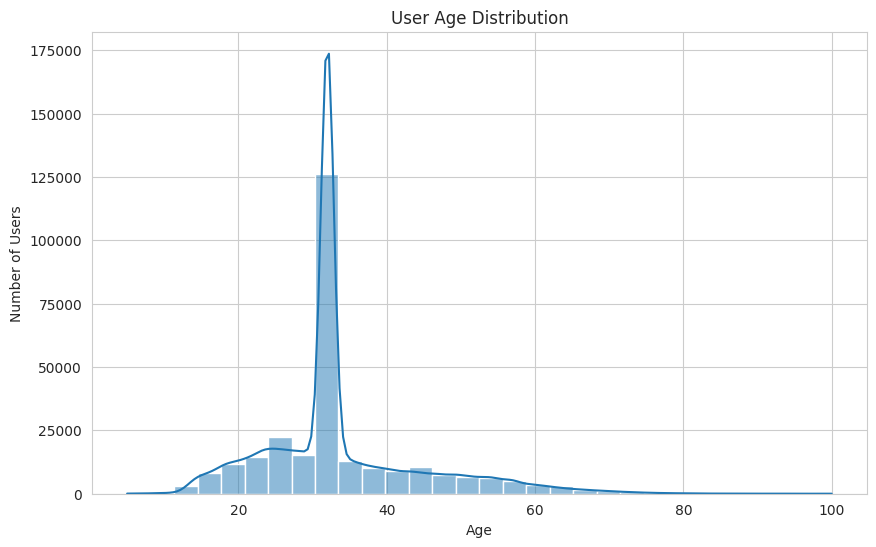

In [9]:
sns.histplot(users['Age'], bins=30, kde=True)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()

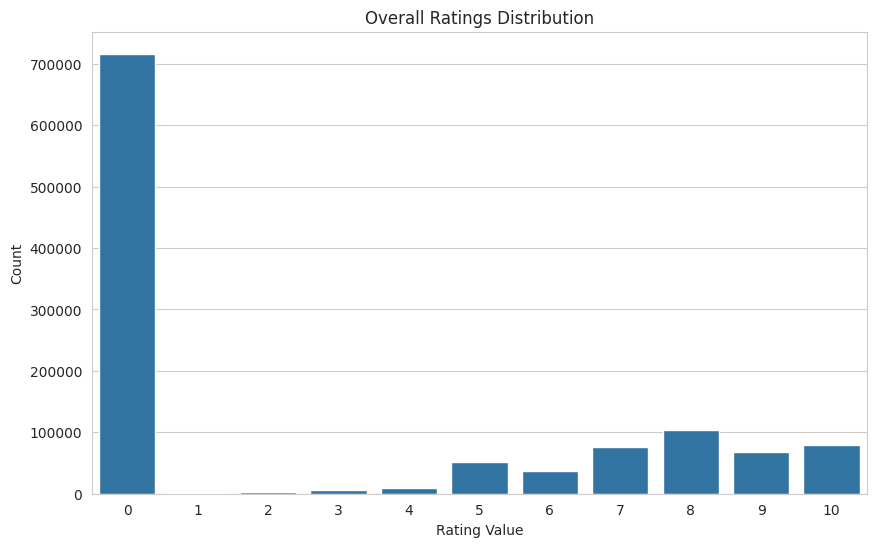

In [10]:
sns.countplot(x=ratings['Book-Rating'])
plt.title("Overall Ratings Distribution")
plt.xlabel("Rating Value")
plt.ylabel("Count")
plt.show()

In [11]:
explicit_ratings = ratings[ratings['Book-Rating'] > 0]
print("Explicit Ratings Shape:", explicit_ratings.shape)

Explicit Ratings Shape: (433671, 3)


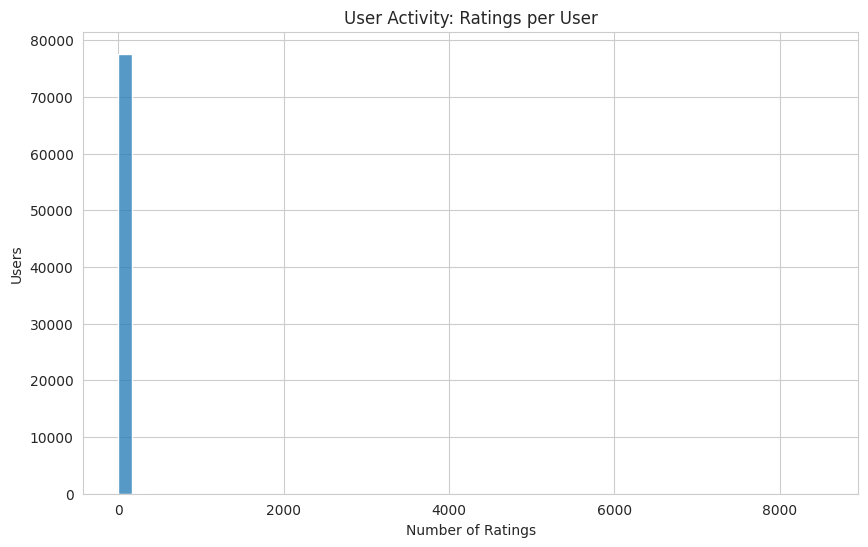

In [12]:
ratings_per_user = explicit_ratings.groupby('User-ID').size()

sns.histplot(ratings_per_user, bins=50)
plt.title("User Activity: Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Users")
plt.show()

In [13]:
ratings_books = explicit_ratings.merge(
    books[['ISBN', 'Book-Title']], on='ISBN', how='left'
)

top_books = (
    ratings_books
    .groupby('Book-Title')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

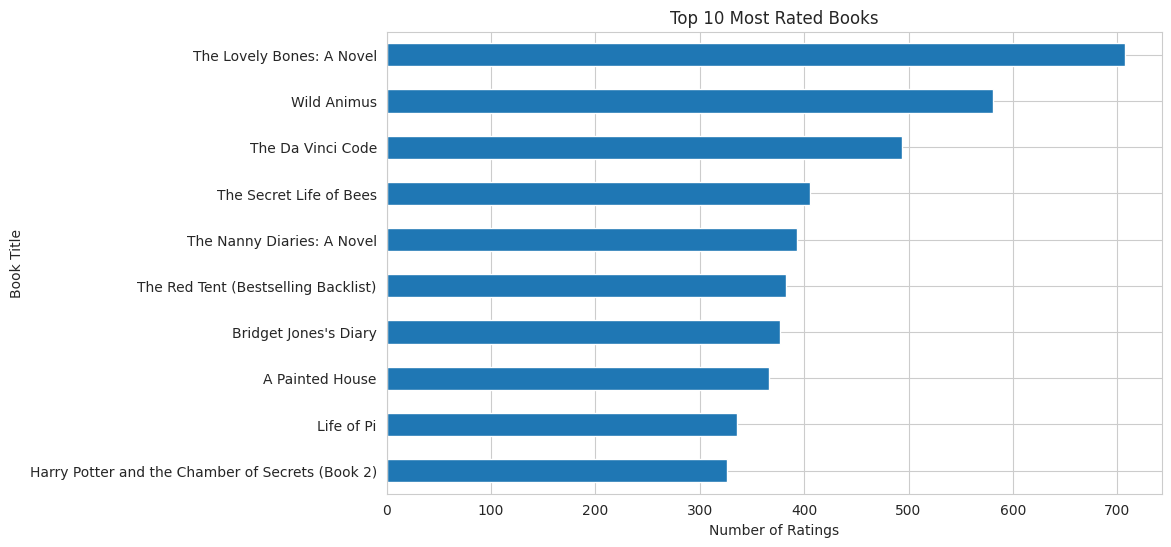

In [14]:
top_books.plot(kind='barh')
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
plt.gca().invert_yaxis()
plt.show()

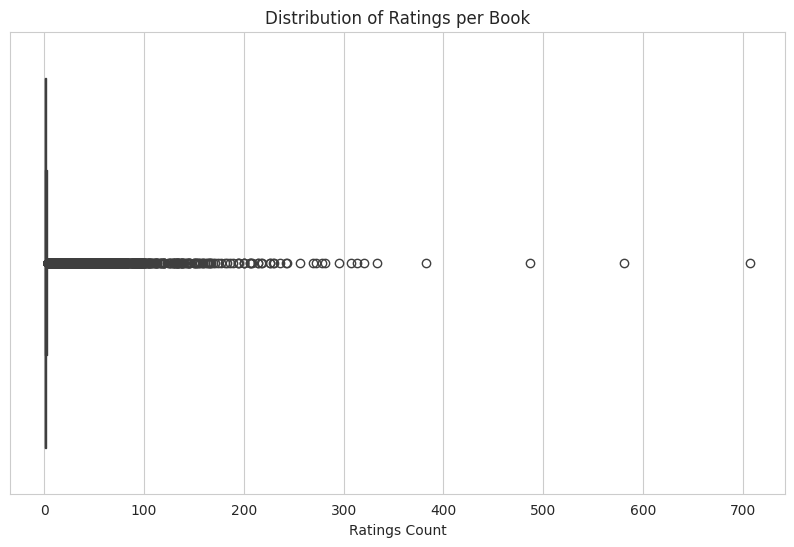

In [15]:
ratings_per_book = explicit_ratings.groupby('ISBN').size()

sns.boxplot(x=ratings_per_book)
plt.title("Distribution of Ratings per Book")
plt.xlabel("Ratings Count")
plt.show()

In [16]:
merged_df = explicit_ratings.merge(users, on='User-ID', how='left')
merged_df = merged_df.merge(
    books[['ISBN', 'Book-Title', 'Book-Author',
           'Image-URL-S', 'Image-URL-M', 'Image-URL-L']],
    on='ISBN',
    how='left'
)

merged_df.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,"seattle, washington, usa",32.0,Rites of Passage,Judith Rae,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,"rijeka, n/a, croatia",16.0,Help!: Level 1,Philip Prowse,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,"rijeka, n/a, croatia",16.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276736,3257224281,8,"salzburg, salzburg, austria",32.0,NaN,NaN,NaN,NaN,NaN
4,276737,0600570967,6,"sydney, new south wales, australia",14.0,NaN,NaN,NaN,NaN,NaN


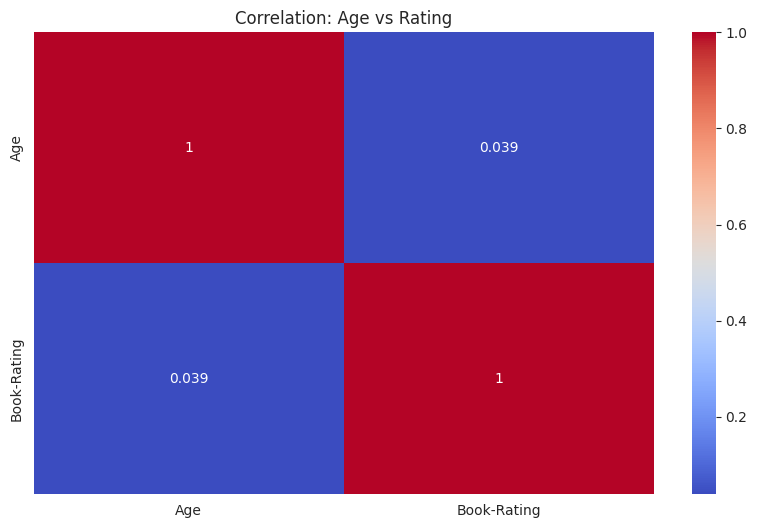

In [17]:
sns.heatmap(
    merged_df[['Age', 'Book-Rating']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation: Age vs Rating")
plt.show()

**MODEL BUILDING**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

import pickle

In [2]:
users = pd.read_csv("/content/Users.csv")
ratings = pd.read_csv("/content/Ratings.csv")
books = pd.read_csv("/content/Books.csv")

/tmp/ipython-input-1597008315.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("/content/Books.csv")


In [3]:
ratings = ratings[ratings['Book-Rating'] > 0]

In [4]:
user_ids = ratings['User-ID'].unique()
book_ids = ratings['ISBN'].unique()

user_map = {u: i for i, u in enumerate(user_ids)}
book_map = {b: i for i, b in enumerate(book_ids)}

ratings['user_idx'] = ratings['User-ID'].map(user_map)
ratings['book_idx'] = ratings['ISBN'].map(book_map)

In [5]:
user_item_matrix = csr_matrix(
    (ratings['Book-Rating'],
     (ratings['user_idx'], ratings['book_idx']))
)

user_item_matrix.shape

(77805, 185973)

In [6]:
train_idx, test_idx = train_test_split(
    ratings.index,
    test_size=0.2,
    random_state=42
)

train_data = ratings.loc[train_idx]
test_data = ratings.loc[test_idx]

In [7]:
train_matrix = csr_matrix(
    (train_data['Book-Rating'],
     (train_data['user_idx'], train_data['book_idx'])),
    shape=user_item_matrix.shape
)

In [8]:
svd = TruncatedSVD(
    n_components=50,
    random_state=42
)

svd.fit(train_matrix)

TruncatedSVD(n_components=50, random_state=42)

In [9]:
# Get latent representations
user_factors = svd.transform(train_matrix)      # shape: (users, k)
item_factors = svd.components_.T               # shape: (books, k)

preds = []
actuals = []

for _, row in test_data.iterrows():
    u = row['user_idx']
    i = row['book_idx']

    pred = np.dot(user_factors[u], item_factors[i])
    preds.append(pred)
    actuals.append(row['Book-Rating'])

rmse = np.sqrt(mean_squared_error(actuals, preds))
rmse

np.float64(7.784104947430968)

In [10]:
test_sample = test_data.sample(10000, random_state=42)

preds, actuals = [], []

for _, row in test_sample.iterrows():
    pred = np.dot(user_factors[row['user_idx']], item_factors[row['book_idx']])
    preds.append(pred)
    actuals.append(row['Book-Rating'])

np.sqrt(mean_squared_error(actuals, preds))

np.float64(7.780458295774903)

In [11]:
def recommend_books(user_id, n=5):
    if user_id not in user_map:
        return []

    user_idx = user_map[user_id]
    scores = pred_matrix[user_idx]

    top_books_idx = np.argsort(scores)[::-1][:n]
    isbn_list = [book_ids[i] for i in top_books_idx]

    return isbn_list

In [13]:
book_metadata = books.set_index('ISBN')[[
    'Book-Title',
    'Book-Author',
    'Image-URL-M'
]].to_dict(orient='index')

len(book_metadata)

271360

In [14]:
def recommend_books_for_user(user_id, n=5):
    if user_id not in user_map:
        return []

    user_idx = user_map[user_id]
    user_vector = user_factors[user_idx]

    scores = np.dot(item_factors, user_vector)
    top_items = np.argsort(scores)[::-1][:n]

    recommended_isbns = [list(book_map.keys())[i] for i in top_items]
    return recommended_isbns

In [15]:
sample_user = ratings['User-ID'].iloc[0]
recommended_isbns = recommend_books_for_user(sample_user, n=5)
recommended_isbns

['0070212570', '0156027321', '0385722206', '0345413881', '0440206154']

In [16]:
def display_recommendations(isbn_list):
    results = []
    for isbn in isbn_list:
        if isbn in book_metadata:
            results.append(book_metadata[isbn])
    return pd.DataFrame(results)

display_recommendations(recommended_isbns)

,Book-Title,Book-Author,Image-URL-M
0,Fried Green Tomatoes at the Whistle Stop Cafe,Fannie Flagg,http://images.amazon.com/images/P/0070212570.0...
1,Life of Pi,Yann Martel,http://images.amazon.com/images/P/0156027321.0...
2,Balzac and the Little Chinese Seamstress : A N...,DAI SIJIE,http://images.amazon.com/images/P/0385722206.0...
3,Dr. Death (Alex Delaware Novels (Paperback)),Jonathan Kellerman,http://images.amazon.com/images/P/0345413881.0...
4,Red Dragon,Thomas Harris,http://images.amazon.com/images/P/0440206154.0...


In [17]:
import pickle

with open("svd_model.pkl", "wb") as f:
    pickle.dump(svd, f)

with open("user_map.pkl", "wb") as f:
    pickle.dump(user_map, f)

with open("book_map.pkl", "wb") as f:
    pickle.dump(book_map, f)

with open("user_factors.pkl", "wb") as f:
    pickle.dump(user_factors, f)

with open("item_factors.pkl", "wb") as f:
    pickle.dump(item_factors, f)

with open("book_metadata.pkl", "wb") as f:
    pickle.dump(book_metadata, f)

In [18]:
import os

os.listdir()

['.config',
 'user_factors.pkl',
 'Ratings.csv',
 'book_metadata.pkl',
 'svd_model.pkl',
 'book_map.pkl',
 'item_factors.pkl',
 'user_map.pkl',
 'Users.csv',
 'Books.csv',
 'sample_data']